<h1><center>Segmentação de clientes em shopping</center></h1>

Problema proposto no kaggle: https://www.kaggle.com/akram24/mall-customers

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.spatial import ConvexHull
import numpy as np
from matplotlib.patches import Ellipse

### 1. Carregando os dados

Buscando os dados onlin,e diretamente de um repo github.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv")

Primeira olhada nos dados

In [3]:
display(df.shape)
df.head(2)

(200, 5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


### 2. Visualizando possíveis agrupamentos

Visualizando pares de atributos dois a dois.

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


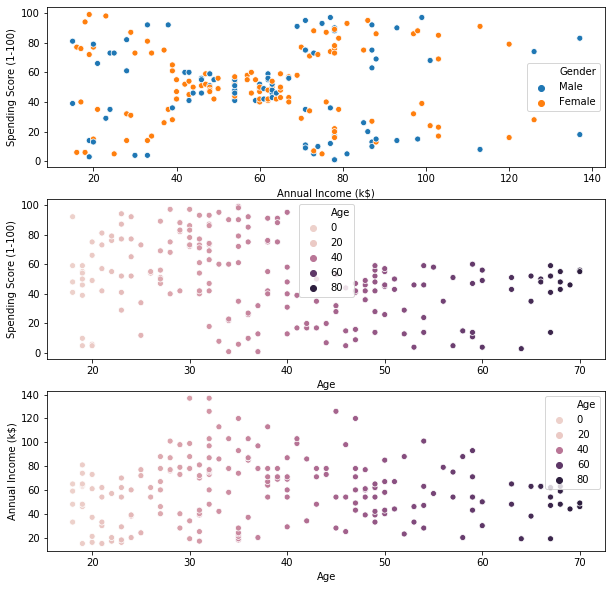

In [4]:
fig, ax =plt.subplots(3,1, figsize=[10,10])
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Gender", ax=ax[0])
sns.scatterplot(data=df, x="Age", y="Spending Score (1-100)", hue="Age", ax=ax[1])
sns.scatterplot(data=df, x="Age", y="Annual Income (k$)", hue="Age", ax=ax[2])
fig.show()

### 3. Análise de clusters

Importando as classes dos algoritmos de agrupamento.

In [5]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

Executando analises com o K-Means

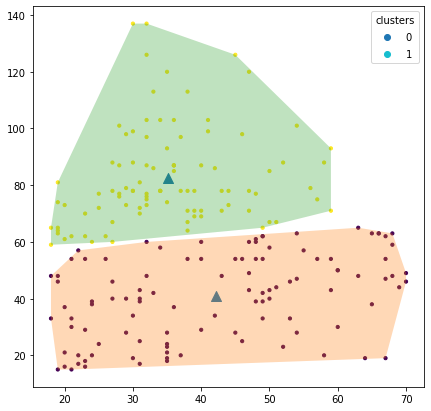

In [56]:
def plot_kmeans(df_subset, x, y, n):
    kmeans = KMeans(n_clusters=n, random_state=0).fit(df_subset)
    df_subset["Cluster"] = kmeans.labels_

    # get centroids
    centroids = kmeans.cluster_centers_
    cen_x = [i[0] for i in centroids] 
    cen_y = [i[1] for i in centroids]

    # # define and map colors
    # colors = ['#DF2020', '#81DF20', '#2095DF']
    # df_subset['c'] = df_subset.Cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

    fig, ax = plt.subplots(1, figsize=(7,7))

    # plot data
    plt.scatter(df_subset[x], df_subset[y], c=df_subset['Cluster'], alpha = 100, s=10)

    # plot centers
    #plt.scatter(cen_x, cen_y, marker='^', c=colors, s=100)
    plt.scatter(cen_x, cen_y, marker='^', s=100)
        
    # draw enclosure
    for i in df_subset.Cluster.unique():
        points = df_subset[df_subset.Cluster == i][['Age', 'Annual Income (k$)']].values
        # get convex hull
        hull = ConvexHull(points)
        # get x and y coordinates
        # repeat last point to close the polygon
        x_hull = np.append(points[hull.vertices,0],
                           points[hull.vertices,0][0])
        y_hull = np.append(points[hull.vertices,1],
                           points[hull.vertices,1][0])
        # plot shape
        #plt.fill(x_hull, y_hull, alpha=0.3, c=colors[i])
        plt.fill(x_hull, y_hull, alpha=0.3)

        # plt.xlim(0,100)
        # plt.ylim(0,100)
        
    ax.legend(*sc.legend_elements(), title='clusters')

x = "Age"
y = "Annual Income (k$)"

df_subset = df[[x, y]].copy()
plot_kmeans(df_subset, x, y, 2)

In [21]:
df_subset.Cluster.value_counts()

0    105
1     95
Name: Cluster, dtype: int64

Executando analises com o GMM

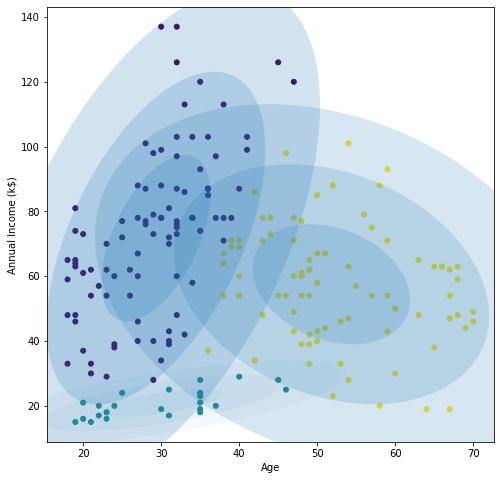

In [7]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(df_subset, x, y,num_comp, label=True, ax=None):
    gm = GaussianMixture(n_components=num_comp, random_state=0).fit(df_subset)
    #ax = ax or plt.gca()
    fig, ax = plt.subplots(1, figsize=(8,8))
    df_subset["Cluster"] =  gm.predict(df_subset)

    ax.scatter(df_subset[x], df_subset[y], c=df_subset["Cluster"], s=25, cmap='viridis',  zorder=1)
    plt.xlabel(x)
    plt.ylabel(y)

    
    w_factor = 0.2 / gm.weights_.max()
    for pos, covar, w in zip(gm.means_, gm.covariances_, gm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

x = "Age"
y = "Annual Income (k$)"
df_subset = df[[x, y]].copy()
plot_gmm(df_subset, x, y, 3)

### 4. Resultados

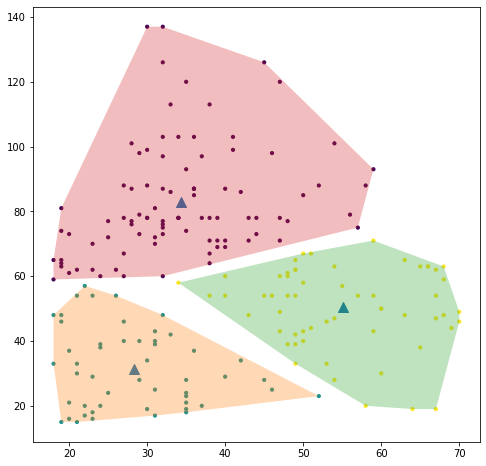

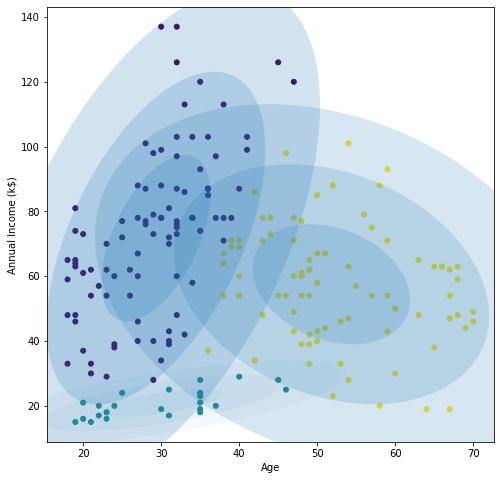

In [9]:
x = "Age"
y = "Annual Income (k$)"

df_sub = df[[x, y]].copy()
plot_kmeans(df_sub, x, y, 3)

df_sub = df[[x, y]].copy()
plot_gmm(df_sub, x, y, 3)